# First Random Forest Baseline

Target variable: Is fire present --> Multiclass classifier\
Target variable: Fire class --> Multiclass classifier\
Target variable: Fire size --> Regressor

Multi-class Classification Options:

* Random forest
* Multiclass logistic regression
* SVM
* K-NN
* Gradient boosting


Regression Options:

* Random forecast regressor
* Multivariate regression
* Lasso regression
* Ridge regression

## Import Modules

In [15]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import auc, roc_curve

%matplotlib inline

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

sys.path.append('C:/Users/jades/1001 Intro to Data Science Notebooks/Project/wildfires-1001/code/functions/')

In [10]:
from sklearn.ensemble import RandomForestClassifier 
# Parameters: (n_estimators=100)

from sklearn.linear_model import LogisticRegression 
# Parameters: (penalty={‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, C=1.0)

from sklearn.svm import SVC 
# Parameters: (C=1.0, kernel={‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’})

from sklearn.neighbors import KNeighborsClassifier 
# Parameters: (n_neighbors=5, weights='uniform', leaf_size=30, p=2)

from sklearn.ensemble import GradientBoostingClassifier
# Parameters: (learning_rate=0.1, n_estimators=100

from sklearn.ensemble import RandomForestRegressor 
# Parameters: (n_estimators=100)

from sklearn.linear_model import LinearRegression
# No parameters

from sklearn.linear_model import Lasso
# Parameters: (alpha=1.0)

from sklearn.linear_model import Ridge
# Parameters: (alpha=1.0)

## Import and Clean Data

In [35]:
# Import main df
data_dir = 'C:/Users/jades/1001 Intro to Data Science Notebooks/Project/wildfires-1001/data'
df_import = {}
df = pd.DataFrame()
for i in np.arange(1, 2):
    df_import[i] = pd.read_pickle(os.path.join(data_dir, f'clean_data/target_df_final_1123_newtargets_{i}.pkl')) 
    df = df.append(df_import[i])

# Import column renaming dictionary
dic_file_path = 'C:/Users/jades/1001 Intro to Data Science Notebooks/Project/wildfires-1001/data/clean_data/ERA_weather-data/ERA_rename_dictionary.pkl'
with open(dic_file_path, 'rb') as handle:
    dic = pickle.load(handle)

# Rename columns
df = df.rename(columns=dic)

#Temporarily drop these columns until they get updated without nulls
#df = df.drop(['adj_fire_count', 'adj_fire_bcount'], axis=1)

In [36]:
df.columns.values

array(['GRID_ID', 'month_id', 'YEAR', 'MONTH', 'COUNTYFP', 'NAME',
       'GRID_AREA', 'Y_bin', 'Y_fire_count', 'Fire_area', 'elev_mean',
       'elev_std', 'elev_media', 'elev_max', 'elev_min', 'elev_range',
       'pl_count', 'total_pl_length', 'road_count', 'total_road_length',
       'MEDIAN_AGE_TOT', 'MEDIAN_AGE_MALE', 'MEDIAN_AGE_FEM',
       'AGEUNDER13_TOT', 'AGE1424_TOT', 'AGE2544_TOT', 'AGE4564_TOT',
       'AGE65PLUS_TOT', 'COUNTY_AREA', 'POPDENSITY', 'POPDENSITY_MALE',
       'POPDENSITY_FEM', 'Structure Arsons', 'Mobile Arsons',
       'Other Arsons', 'Total Arsons', 'Total Arsons Cleared',
       'Unemployment', 'medianHHI2018', 'adj_fire_count',
       'adj_fire_bcount', 'U_wind_10m_0hrs', 'V_wind_10m_0hrs',
       '2m_dewpoint_tmp_0hrs', '2m_tmp_0hrs', 'leaf_high_veg_0hrs',
       'leaf_low_veg_0hrs', 'surface_pressure_0hrs', 'tot_prcp_0hrs',
       'U_wind_10m_6hrs', 'V_wind_10m_6hrs', '2m_dewpoint_tmp_6hrs',
       '2m_tmp_6hrs', 'leaf_high_veg_6hrs', 'leaf_low_veg_6h

In [13]:
#Convert data types to float 32 to be compatible with random forest
for col in df.columns:
    if df[col].dtypes == 'float64':
        df[col] = df[col].astype(np.float32)

In [6]:
#Create groups from our columns
Y_cols = ['Y_bin', 'Y_fire_count', 'Y_fire_area_prop', 'Y_fire_class_size']
non_weather_cols = [i for i in df.columns if (str.find(i,"hrs")==-1) & (i not in(Y_cols))]
weather_cols = [i for i in df.columns if i not in(non_weather_cols)]
oth_subset = ['elev_mean','elev_std','elev_media','elev_max','elev_min','elev_range','adj_fire_count','adj_fire_bcount']

## Split Data and Create Models

In [64]:
# Create the dataframes for our features and for each of the target variables
# Drop the unneccessary columns 
non_mod_cols = ['GRID_ID',
 'month_id',
 'MONTH',
 'YEAR',
 'COUNTYFP',
 'NAME',
 'GRID_AREA',
 'COUNTY_ARE',
 'month_id_old_x',
 'month_id_old_y',
 'geometry',
 'Y_bin',
# 'Y_fire_count',
# 'Y_fire_area_prop',
 'Y_fire_class_size']

df_train = df[df['YEAR'] <= 2017]
df_test = df[df['YEAR'] > 2017]

train_X = df_train.drop(non_mod_cols, axis=1)

test_X = df_test.drop(non_mod_cols, axis=1)

train_Y_bin = df_train['Y_bin']
#train_Y_area = df_train['Y_fire_area_prop']
#train_Y_count = df_train['Y_fire_count']
train_Y_class = df_train['Y_fire_class_size']

test_Y_bin = df_test['Y_bin']
#test_Y_count = df_test['Y_fire_count']
#test_Y_area = df_test['Y_fire_area_prop']
test_Y_class = df_test['Y_fire_class_size']

In [65]:
#Initialize random forest model
rf_Y_bin = RandomForestClassifier(n_estimators=100)
rf_Y_bin.fit(train_X, train_Y_bin)

rf_Y_class = RandomForestClassifier(n_estimators=100)
rf_Y_class.fit(train_X, train_Y_bin)

RandomForestClassifier()

## Validate and Plot Models

In [81]:
pred_proba_Y_bin = rf_Y_bin.predict_proba(test_X)[:,1]

In [82]:
pred_proba_Y_bin

array([0.01, 0.2 , 0.05, ..., 0.04, 0.03, 0.06])

Confusion Matrix
          0         1
0  0.889100  0.110900
1  0.575188  0.424812
--------------------------------------


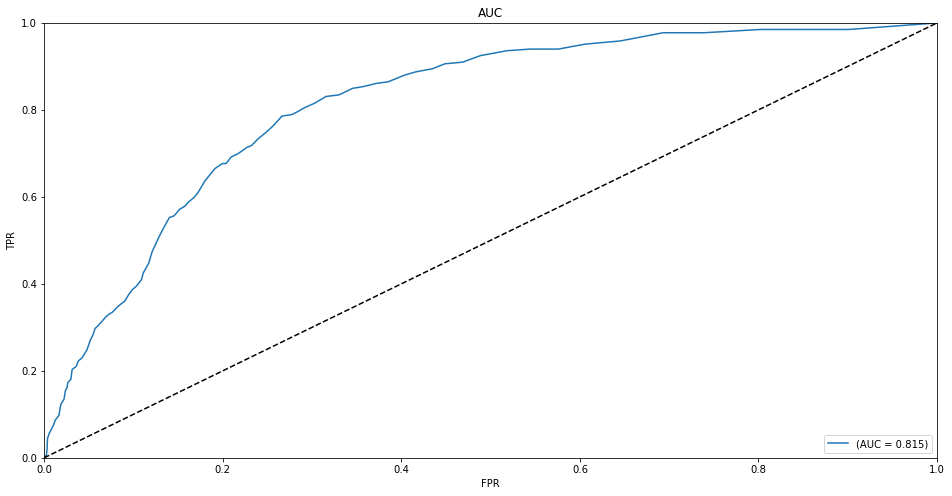

In [92]:
#Validate Y_bin

#Predictions
pred_Y_bin = rf_Y_bin.predict(test_X)
pred_proba_Y_bin = rf_Y_bin.predict_proba(test_X)[:,1]

#Confusion matrix
print('Confusion Matrix')
print(pd.DataFrame(confusion_matrix(test_Y_bin, pred_Y_bin, normalize = 'true'), columns = ['0', '1'], index = ['0','1']))
print('--------------------------------------')

#Plot AUC
fpr, tpr, threshold = roc_curve(test_Y_bin, pred_proba_Y_bin)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(16,8))
plt.plot(fpr, tpr, label = f'(AUC = {np.round(roc_auc,3)})') 
plt.plot([0, 1], [0, 1], 'k--')
plt.title("AUC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc="lower right")
plt.show()

100

In [9]:
full_target_data

,GRID_ID,month_id,YEAR,MONTH,COUNTYFP,NAME,GRID_AREA,COUNTY_ARE,Y_bin,Y_fire_count,Fire_area,elev_mean,elev_std,elev_media,elev_max,elev_min,elev_range,pl_count,total_pl_length,road_count,total_road_length,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM,AGEUNDER13_TOT,AGE1424_TOT,AGE2544_TOT,AGE4564_TOT,AGE65PLUS_TOT,COUNTY_AREA,POPDENSITY,POPDENSITY_MALE,POPDENSITY_FEM,Structure Arsons,Mobile Arsons,Other Arsons,Total Arsons,Total Arsons Cleared,Unemployment,medianHHI2018,adj_fire_count,adj_fire_bcount,U_wind_10m_0hrs,V_wind_10m_0hrs,2m_dewpoint_tmp_0hrs,2m_tmp_0hrs,leaf_high_veg_0hrs,leaf_low_veg_0hrs,surface_pressure_0hrs,tot_prcp_0hrs,U_wind_10m_6hrs,V_wind_10m_6hrs,2m_dewpoint_tmp_6hrs,2m_tmp_6hrs,leaf_high_veg_6hrs,leaf_low_veg_6hrs,surface_pressure_6hrs,tot_prcp_6hrs,U_wind_10m_12hrs,V_wind_10m_12hrs,2m_dewpoint_tmp_12hrs,2m_tmp_12hrs,leaf_high_veg_12hrs,leaf_low_veg_12hrs,surface_pressure_12hrs,tot_prcp_12hrs,U_wind_10m_18hrs,V_wind_10m_18hrs,2m_dewpoint_tmp_18hrs,2m_tmp_18hrs,leaf_high_veg_18hrs,leaf_low_veg_18hrs,surface_pressure_18hrs,tot_prcp_18hrs,hist_bin_1m,hist_bin_1y,hist_bin_5y,hist_bin_10y,Y_fire_class_size_prev_month,Y_fire_class_size_prev_1yr,Y_fire_class_size_prev_5yr,Y_fire_class_size_prev_10yr,Y_fire_area_prop_prev_month,Y_fire_area_prop_prev_1yr,Y_fire_area_prop_prev_5yr,Y_fire_area_prop_prev_10yr,hist_p_time_1m,total_fire_days,hist_p_time_1y,tot_area_fire_prev_1yr,U_wind_10m_0hrs_1y,U_wind_10m_6hrs_1y,U_wind_10m_12hrs_1y,U_wind_10m_18hrs_1y,V_wind_10m_0hrs_1y,V_wind_10m_6hrs_1y,V_wind_10m_12hrs_1y,V_wind_10m_18hrs_1y,2m_dewpoint_tmp_0hrs_1y,2m_dewpoint_tmp_6hrs_1y,2m_dewpoint_tmp_12hrs_1y,2m_dewpoint_tmp_18hrs_1y,2m_tmp_0hrs_1y,2m_tmp_6hrs_1y,2m_tmp_12hrs_1y,2m_tmp_18hrs_1y,leaf_high_veg_0hrs_1y,leaf_high_veg_6hrs_1y,leaf_high_veg_12hrs_1y,leaf_high_veg_18hrs_1y,leaf_low_veg_0hrs_1y,leaf_low_veg_6hrs_1y,leaf_low_veg_12hrs_1y,leaf_low_veg_18hrs_1y,surface_pressure_0hrs_1y,surface_pressure_6hrs_1y,surface_pressure_12hrs_1y,surface_pressure_18hrs_1y,tot_prcp_0hrs_1y,tot_prcp_6hrs_1y,tot_prcp_12hrs_1y,tot_prcp_18hrs_1y,U_wind_10m_0hrs_5y,U_wind_10m_6hrs_5y,U_wind_10m_12hrs_5y,U_wind_10m_18hrs_5y,V_wind_10m_0hrs_5y,V_wind_10m_6hrs_5y,V_wind_10m_12hrs_5y,V_wind_10m_18hrs_5y,2m_dewpoint_tmp_0hrs_5y,2m_dewpoint_tmp_6hrs_5y,2m_dewpoint_tmp_12hrs_5y,2m_dewpoint_tmp_18hrs_5y,2m_tmp_0hrs_5y,2m_tmp_6hrs_5y,2m_tmp_12hrs_5y,2m_tmp_18hrs_5y,leaf_high_veg_0hrs_5y,leaf_high_veg_6hrs_5y,leaf_high_veg_12hrs_5y,leaf_high_veg_18hrs_5y,leaf_low_veg_0hrs_5y,leaf_low_veg_6hrs_5y,leaf_low_veg_12hrs_5y,leaf_low_veg_18hrs_5y,surface_pressure_0hrs_5y,surface_pressure_6hrs_5y,surface_pressure_12hrs_5y,surface_pressure_18hrs_5y,tot_prcp_0hrs_5y,tot_prcp_6hrs_5y,tot_prcp_12hrs_5y,tot_prcp_18hrs_5y,U_wind_10m_0hrs_10y,U_wind_10m_6hrs_10y,U_wind_10m_12hrs_10y,U_wind_10m_18hrs_10y,V_wind_10m_0hrs_10y,V_wind_10m_6hrs_10y,V_wind_10m_12hrs_10y,V_wind_10m_18hrs_10y,2m_dewpoint_tmp_0hrs_10y,2m_dewpoint_tmp_6hrs_10y,2m_dewpoint_tmp_12hrs_10y,2m_dewpoint_tmp_18hrs_10y,2m_tmp_0hrs_10y,2m_tmp_6hrs_10y,2m_tmp_12hrs_10y,2m_tmp_18hrs_10y,leaf_high_veg_0hrs_10y,leaf_high_veg_6hrs_10y,leaf_high_veg_12hrs_10y,leaf_high_veg_18hrs_10y,leaf_low_veg_0hrs_10y,leaf_low_veg_6hrs_10y,leaf_low_veg_12hrs_10y,leaf_low_veg_18hrs_10y,surface_pressure_0hrs_10y,surface_pressure_6hrs_10y,surface_pressure_12hrs_10y,surface_pressure_18hrs_10y,tot_prcp_0hrs_10y,tot_prcp_6hrs_10y,tot_prcp_12hrs_10y,tot_prcp_18hrs_10y,Y_fire_class_size,geometry,Y_fire_area_prop,month_id_old
0,0,1990_10,1990,10,15,Del Norte,2.665977e+09,5.725577e+09,0,0,0.0,36.480644,883.856638,1200.0,4400.0,40.0,4360.0,1.0,23134.077517,34.0,355922.196466,39.1,37.3,42.2,0.813892,0.698096,1.382044,1.426407,0.676438,5.725577e+09,4.996877,2.778235,2.218641,5,6,1,12,3,0.133,48518,0.000000,0.000000,1.451917,-1.204220,284.927313,292.324774,4.962724,0.285395,95942.681818,0.000326,-0.516612,-0.739925,284.828258,286.949840,4.962724,0.285395,96006.505682,0.000091,-0.755508,-0.339752,283.400724,284.878440,4.962724,0.2

In [39]:
df['Y_fire_area_prop'].min()

0.0

(array([2.3599e+04, 9.2000e+01, 5.4000e+01, 3.2000e+01, 2.9000e+01,
        1.4000e+01, 1.2000e+01, 1.0000e+01, 6.0000e+00, 6.0000e+00,
        3.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        4.0000e+00, 3.0000e+00, 3.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([0.        , 0.01638484, 0.03276969, 0.04915453, 0.06553937,
        0.08192421, 0.09830906, 0.1146939 , 0.13107874, 0.14746358,
        0.16384843, 0.18023327, 0.19661811, 0.21300296, 0.2293878 ,
        0.24577264, 0.26215748, 0.27854233, 0.29492717, 0.31131201,
        0.32769685]),
 <BarContainer object of 20 artists>)

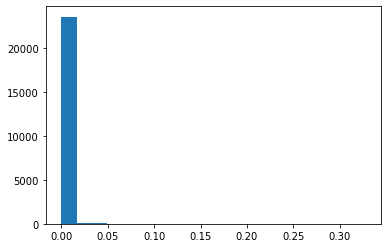

In [89]:
plt.hist(df['Y_fire_area_prop'], bins=20)

(array([2.022e+03, 9.200e+01, 5.400e+01, 3.200e+01, 2.900e+01, 1.400e+01,
        1.200e+01, 1.000e+01, 6.000e+00, 6.000e+00, 3.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 3.000e+00, 3.000e+00,
        0.000e+00, 3.000e+00]),
 array([2.39272915e-08, 1.63848654e-02, 3.27697069e-02, 4.91545484e-02,
        6.55393899e-02, 8.19242314e-02, 9.83090730e-02, 1.14693914e-01,
        1.31078756e-01, 1.47463597e-01, 1.63848439e-01, 1.80233280e-01,
        1.96618122e-01, 2.13002963e-01, 2.29387805e-01, 2.45772646e-01,
        2.62157488e-01, 2.78542330e-01, 2.94927171e-01, 3.11312013e-01,
        3.27696854e-01]),
 <BarContainer object of 20 artists>)

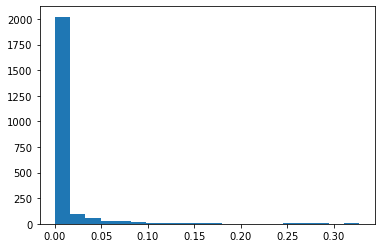

In [88]:
df_test = df[(df['Y_fire_area_prop'] > 0.00000001) & (df['Y_fire_area_prop'] < 1)]['Y_fire_area_prop']
#df_test2 = df[(df['Y_fire_area_prop'] > 0.0002)]['Y_fire_area_prop']

plt.hist(df_test, bins=20)

(array([497., 970., 338., 175.,  86.,  67.,  56.,  34.,  20.,  14.,  14.,
          6.,   3.,   2.,   1.,   5.,   3.,   3.,   0.,   3.]),
 array([0.05698575, 0.09895273, 0.14091971, 0.18288669, 0.22485367,
        0.26682065, 0.30878763, 0.35075461, 0.39272159, 0.43468857,
        0.47665555, 0.51862253, 0.56058951, 0.60255649, 0.64452347,
        0.68649045, 0.72845742, 0.7704244 , 0.81239138, 0.85435836,
        0.89632534]),
 <BarContainer object of 20 artists>)

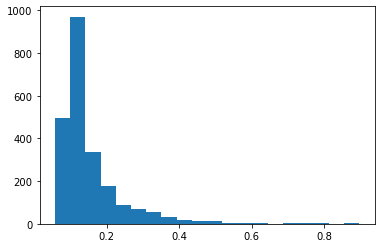

In [87]:
random = 1/(np.log(1/df[(df['Y_fire_area_prop'] > 0.00000001)]['Y_fire_area_prop']))

plt.hist(random, bins=20)